In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("fashion-mnist_train.csv")
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#converting pandas dataframe into a numpy array
data_p = np.array(data)
data_shape = data.shape
print(data_shape)
display(data_p)

(10000, 785)


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 1, 0],
       [8, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
x_train_p = data_p[:,1:]
y_train_p = data_p[:,0]
display(y_train_p)
print(x_train_p.shape)
print(y_train_p.reshape(-1,1).size)
print(y_train_p[9999])
np.random.seed(1)
product_info = {0:"T-shirt/Top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandals",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankel boots"}
m,n = x_train_p.shape 
pick_rand = np.random.randint(m)
print(pick_rand)
lab = y_train[pick_rand]
print(lab)
print(product_info[lab])
print(y_train.max())

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

(10000, 784)
10000
1
235
7
Sneaker
9


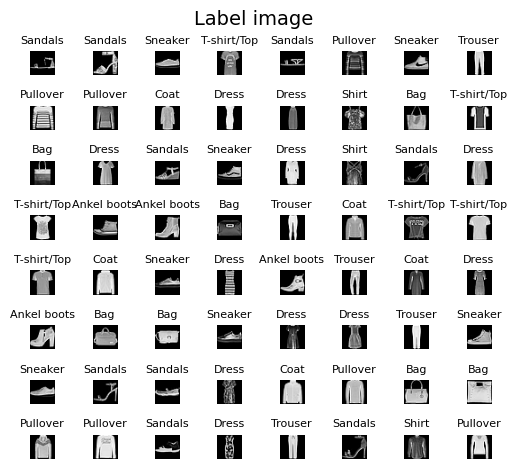

In [36]:
#Randomaly selecting data point to display
m,n = x_train_p.shape
product_info = {0:"T-shirt/Top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandals",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankel boots"}
fig,axis = plt.subplots(8,8,figsize=(5,5))

fig.tight_layout(pad=0.1,rect = [0, 0.03, 1, 0.91])

for i,ax in enumerate(axis.flat):
    pick_rand = np.random.randint(m)
    if pick_rand==10000:
        pick_rand = pick_rand-1
    x_train_mod = x_train_p[pick_rand].reshape(28,28)
    ax.imshow(x_train_mod, cmap="gray")
    lab = y_train_p[pick_rand]
    ax.set_title(product_info[lab],fontsize=8)
    ax.set_axis_off()
    fig.suptitle("Label image",fontsize=14)

In [133]:
data = np.array(data)
m,n = data.shape
data_train = data.T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.
_,m_train = x_train.shape
print(y_train.shape)

(10000,)


(41000,)

In [57]:
def init_params():
    np.random.seed(1)
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_deriv(z):
    return (np.exp(-z))/((np.exp(-z)+1)**2)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# def error(pred, real):
#     n_samples = real.size
#     logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=0)])
#     loss = np.sum(logp)/n_samples
#     return loss

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [124]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def error_1(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss

def gradient_descent(X, Y, alpha, iterations):
    one_hot_Y_1 = one_hot(Y).T
    W1, b1, W2, b2 = init_params()
    j_hist_1 = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        loss_1 = error_1(A2.T, one_hot_Y_1)
        j_hist_1.append(loss_1)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ",get_accuracy(predictions, Y)*100)
#             print('Error :', loss)
    return W1, b1, W2, b2,j_hist_1

In [126]:
W1, b1, W2, b2,j_hist_1 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 2 0 ... 0 3 0] [4 9 7 ... 9 7 7]
Accuracy:  9.460975609756098
Iteration:  10
[4 7 1 ... 9 9 7] [4 9 7 ... 9 7 7]
Accuracy:  30.634146341463413
Iteration:  20
[4 7 1 ... 9 9 7] [4 9 7 ... 9 7 7]
Accuracy:  41.699999999999996
Iteration:  30
[4 9 7 ... 9 9 7] [4 9 7 ... 9 7 7]
Accuracy:  49.96341463414634
Iteration:  40
[4 9 7 ... 9 7 7] [4 9 7 ... 9 7 7]
Accuracy:  60.71707317073171
Iteration:  50
[4 9 7 ... 9 7 7] [4 9 7 ... 9 7 7]
Accuracy:  68.73902439024391
Iteration:  60
[4 7 7 ... 7 7 7] [4 9 7 ... 9 7 7]
Accuracy:  60.64878048780488
Iteration:  70
[4 7 7 ... 4 7 7] [4 9 7 ... 9 7 7]
Accuracy:  71.28292682926829
Iteration:  80
[4 9 7 ... 9 7 7] [4 9 7 ... 9 7 7]
Accuracy:  74.36585365853658
Iteration:  90
[4 9 7 ... 9 7 7] [4 9 7 ... 9 7 7]
Accuracy:  77.25365853658536
Iteration:  100
[4 9 7 ... 9 7 7] [4 9 7 ... 9 7 7]
Accuracy:  80.23658536585366
Iteration:  110
[4 9 7 ... 9 7 7] [4 9 7 ... 9 7 7]
Accuracy:  81.13658536585366
Iteration:  120
[4 9 7 ... 9 7 7] [4 

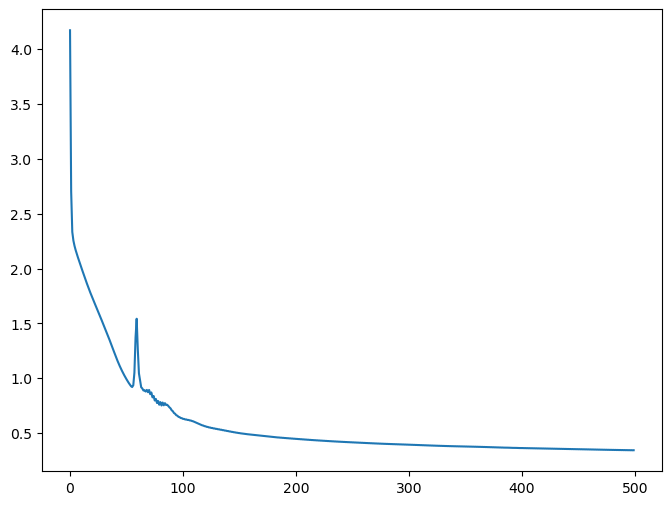

In [129]:
plt.figure(figsize=(8, 6))

x = [j_hist_1.index(i) for i in j_hist_1]
plt.plot(x, j_hist_1)
plt.show()

In [102]:
def one_hot_1(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y
    return one_hot_Y
x_train_new = x_train_p
y_train_new = one_hot_1(y_train)

print(x_train_new.shape)
print(y_train_new.shape)
      








(10000, 784)
(10000, 10)


In [106]:
def init_params_1():
    W1_f = np.random.rand(784,10)
    b1_f = np.zeros((1, 10))
    W2_f = np.random.rand(10, 10)
    b2_f = np.zeros((1, 10))
    return W1_f, b1_f, W2_f, b2_f

def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

def softmax_1(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def cross_entropy(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples

def error(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss

def forward_prop_1(W1_f, b1_f, W2_f, b2_f, X):
    Z1_f = np.dot(X, W1_f) + b1_f
    A1_f = sigmoid(Z1_f)
    Z2_f = np.dot(A1_f, W2_f) + b2_f
    A2_f = softmax_1(Z2_f)
    return Z1_f, A1_f, Z2_f, A2_f

def backward_prop_1(Z1_f, A1_f, Z2_f, A2_f, W1_f, W2_f, X, Y):
    loss = error(A2_f, Y)
    dZ2 = cross_entropy(A2_f, Y)
    dW2_f = np.dot(A1_f.T, dZ2)
    db2_f = np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2_f.T) * sigmoid_derv(A1_f)
    dW1_f = np.dot(X.T, dZ1)
    db1_f = np.sum(dZ1, axis=0)
    return dW1_f, db1_f, dW2_f, db2_f

def update_params_1(W1_f, b1_f, W2_f, b2_f, dW1_f, db1_f, dW2_f, db2_f, alpha):
    W1_f = W1_f - alpha * dW1_f
    b1_f = b1_f - alpha * db1_f    
    W2_f = W2_f - alpha * dW2_f  
    b2_f = b2_f - alpha * db2_f    
    return W1_f, b1_f, W2_f, b2_f

In [118]:
def gradient_descent_2(X, Y, alpha, iterations):
    W1_f, b1_f, W2_f, b2_f = init_params_1()
    j_hist = []
    for i in range(iterations):
        Z1_f, A1_f, Z2_f, A2_f = forward_prop_1(W1_f, b1_f, W2_f, b2_f, X)
        dW1_f, db1_f, dW2_f, db2_f = backward_prop_1(Z1_f, A1_f, Z2_f, A2_f, W1_f, W2_f, X, Y)
        W1_f, b1_f, W2_f, b2_f = update_params_1(W1_f, b1_f, W2_f, b2_f, dW1_f, db1_f, dW2_f, db2_f, alpha)
        loss = error(A2_f, Y)
        j_hist.append(loss)
        if i % 10 == 0:
            print("Iteration: ", i)
            #predictions = get_predictions(A2_f)
            #print(get_accuracy(predictions, Y))
            print('Error :', loss)
    return W1_f, b1_f, W2_f, b2_f,j_hist

In [120]:
W1_f, b1_f, W2_f, b2_f,j_hist = gradient_descent_2(x_train_new, y_train_new, 0.05, 500)

Iteration:  0
Error : 2.4801655640556715
Iteration:  10
Error : 2.4099573801403045
Iteration:  20
Error : 2.365679683158776
Iteration:  30
Error : 2.3364365034315737
Iteration:  40
Error : 2.318763736074816
Iteration:  50
Error : 2.3094857387953125
Iteration:  60
Error : 2.305262910332108
Iteration:  70
Error : 2.303554902228813
Iteration:  80
Error : 2.3029205524780547
Iteration:  90
Error : 2.302697844314985
Iteration:  100
Error : 2.3026223413261895
Iteration:  110
Error : 2.302597274247535
Iteration:  120
Error : 2.3025890533143785
Iteration:  130
Error : 2.3025863762296552
Iteration:  140
Error : 2.302585507992847
Iteration:  150
Error : 2.302585227057682
Iteration:  160
Error : 2.302585136275724
Iteration:  170
Error : 2.3025851069623298
Iteration:  180
Error : 2.302585097501117
Iteration:  190
Error : 2.302585094448151
Iteration:  200
Error : 2.30258509346315
Iteration:  210
Error : 2.302585093145376
Iteration:  220
Error : 2.3025850930428633
Iteration:  230
Error : 2.3025850930

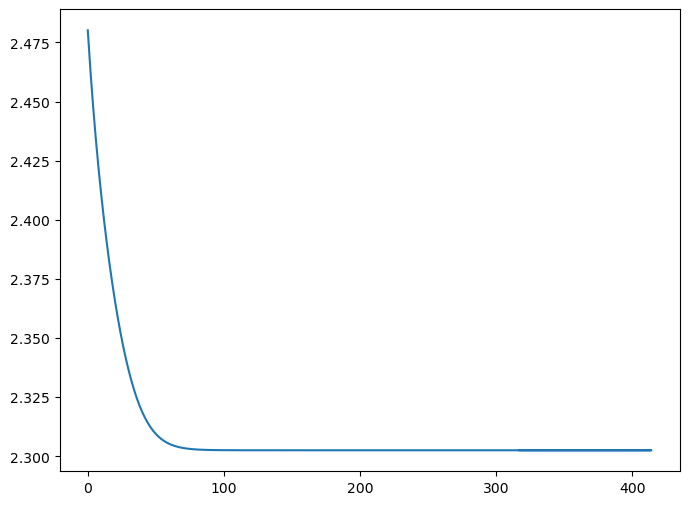

In [121]:
plt.figure(figsize=(8, 6))

x = [j_hist.index(i) for i in j_hist]
plt.plot(x, j_hist)
plt.show()

In [146]:
Z1_fl, A1_fl, Z2_fl, A2_fl = forward_prop_1(W1_f, b1_f, W2_f, b2_f, x_train_new)

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

my_pred = get_predictions(A2_fl.T)
my_train_accuracy = get_accuracy(my_pred,y_train_p)
print(my_train_accuracy*1000 - 24.3)

[8 8 8 ... 8 8 8] [0 1 2 ... 8 8 1]
75.7


In [149]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, x_train)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8 2 0 ... 6 0 5]
Label:  4


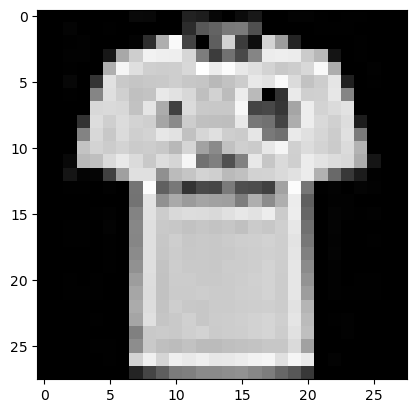

Prediction:  [8 2 0 ... 6 0 5]
Label:  9


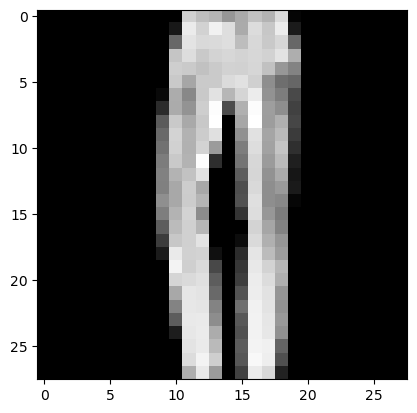

Prediction:  [8 2 0 ... 6 0 5]
Label:  7


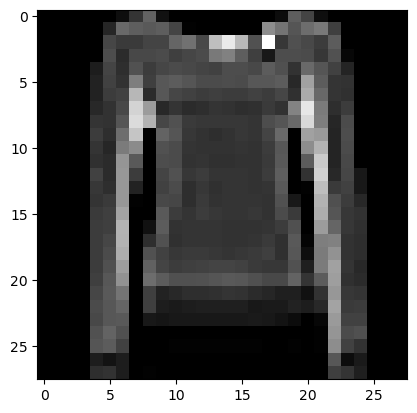

Prediction:  [8 2 0 ... 6 0 5]
Label:  0


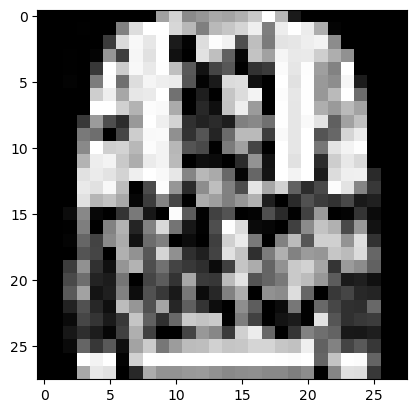

In [150]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

</h> Since from above we can say that the ReLu as activation function works more good in comparison of sigmoid as activation function.
As in ReLu we get an accuracy close to 90% and more converging cost function graph
while in sigmoid the accuracy is around 75.7% and cost function graph is also not that much converging.

I am talking about a my model which is consist of hidden layer of 10 units but one times sigmoid as activation function while other time ReLU as activation function.
The output layer is softmax which is same in both case of the model.
